# PR

Pada tugas sesi ini kalian akan mengerjakan beberapa soal terkait dengan statistika deskriptif dan inferensi statistik.

Data yang digunakan adalah data hasil ujian murid sebelum vs setelah mendapatkan pelatihan modul khusus.

Fokus dari analisis adalah ingin mengetahui efektivitas dari pemberian modul tambahan.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
data = """Student,Pre-module,Post-module
1,18,22
2,21,25
3,16,17
4,22,24
5,19,16
6,24,29
7,17,20
8,21,23
9,23,19
10,18,20
11,14,15
12,16,15
13,16,18
14,19,26
15,18,18
16,20,24
17,12,18
18,22,25
19,15,19
20,17,16"""

from io import StringIO
df = pd.read_csv(StringIO(data))
df

,Student,Pre-module,Post-module
0,1,18,22
1,2,21,25
2,3,16,17
3,4,22,24
4,5,19,16
5,6,24,29
6,7,17,20
7,8,21,23
8,9,23,19
9,10,18,20


# Soal 1
Hitung statistik deskriptif dari nilai ujian setelah vs sebelum mengikuti modul.
Apa saja yang bisa disimpulkan?

In [3]:
df.describe()

,Student,Pre-module,Post-module
count,20.00000,20.000000,20.000000
mean,10.50000,18.400000,20.450000
std,5.91608,3.152276,4.058454
min,1.00000,12.000000,15.000000
25%,5.75000,16.000000,17.750000
50%,10.50000,18.000000,19.500000
75%,15.25000,21.000000,24.000000
max,20.00000,24.000000,29.000000


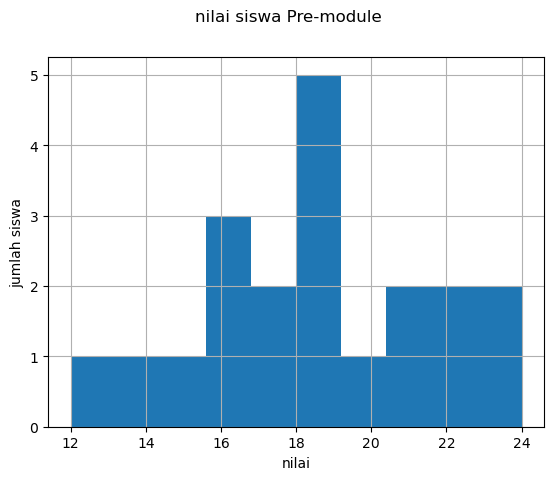

In [12]:
df['Pre-module'].hist()
plt.suptitle('nilai siswa Pre-module')
plt.xlabel('nilai')
plt.ylabel('jumlah siswa')
plt.show()

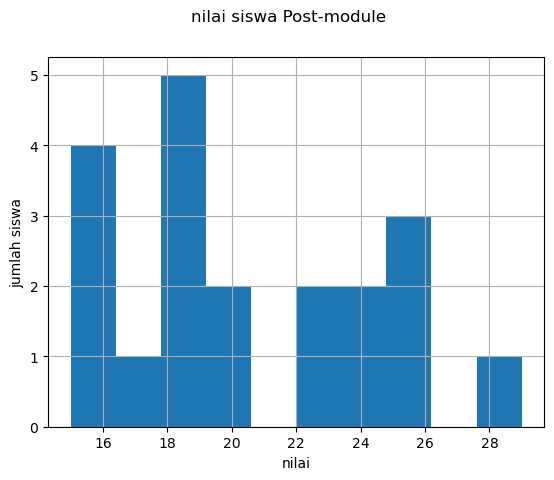

In [13]:
df['Post-module'].hist()
plt.suptitle('nilai siswa Post-module')
plt.xlabel('nilai')
plt.ylabel('jumlah siswa')
plt.show()

In [19]:
df[['Pre-module','Post-module']].corr()

,Pre-module,Post-module
Pre-module,1.000000,0.717477
Post-module,0.717477,1.000000


<AxesSubplot:xlabel='Pre-module', ylabel='Post-module'>

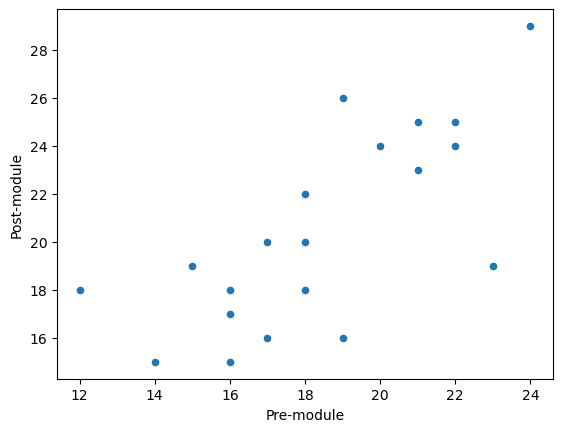

In [14]:
df.plot(x='Pre-module',y='Post-module',kind='scatter')

[]

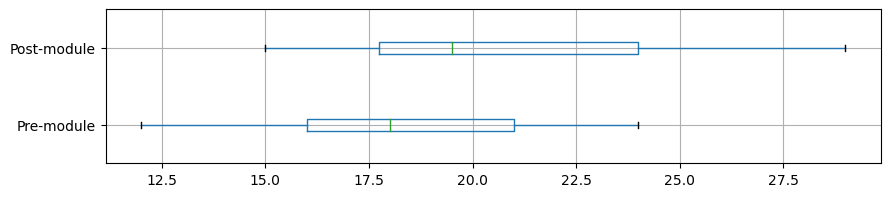

In [18]:
plt.figure(figsize=(10,2))
b_plot = df.boxplot(column = ['Pre-module','Post-module'],vert=False) 
b_plot.plot()

Kesimpulan:
1. ada tren kenaikan nilai siswa setelah pelatihan modul khusus, hal terebut ditunjukan pada gambar visualisasi boxplot post module terjadi pergeseran ke angka yang lebih besar pada nilai quartile 1,2 dan 3, nilai maxsimum dan minimum.
2. nilai korelasi pre-module dan post-module sebesar 0,71
3. pada visualisisasi scatter plot terdapat data yang outlier, di mana ada siswa yang mengalami kenaikan nilai yang signifikan dan ada siswa yang mengalami penurunan nilai yang signifikan.
4. pada grafik histogram nilai siswa post-module, sebaran nilai siswa banyak terkumpul di rentang 15 sampai 21
5. nilai standar deviasi terjadi kenaikan menunjukan nilai siswa semakin beragam

# Soal 2

Paired T-test adalah varian dari T-test dimana sebuah sampel akan diukur sebanyak 2 kali (biasanya sebelum vs setelah suatu *treatment*). 

Lakukan uji hipotesis apakah nilai ujian murid menjadi lebih baik setelah pemberian modul atau tidak.

Gunakan code dari dokumentasi berikut
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [30]:
'''
H0 = tidak ada kenaikan nilai rata- rata siswa
H1 = ada kenaikan nilai rata-rata siswa 
H0 = 18,4
H1 > 18,4
'''
alfa = 0.005
data_Pre = df['Pre-module'].values
data_Post = df['Post-module'].values

array([18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12,
       22, 15, 17], dtype=int64)

In [38]:
scipy.stats.ttest_rel(data_Pre,data_Post, axis=0, nan_policy='omit', alternative='less')

Ttest_relResult(statistic=-3.231252665580312, pvalue=0.002197482996592832)

karena pvalue < alfa 
maka ada bukti untuk menolak H0